## Creation of Timeseries Dataframe of Various items

### Imports

In [217]:
import requests
import pandas as pd
import json

from sklearn.preprocessing import StandardScaler

import time
import random
import csv

import matplotlib.pyplot as plt
from datetime import datetime

### Practice Pulling from services.runescape.com for individual item

In [224]:
url = 'http://services.runescape.com/m=itemdb_oldschool/api/catalogue/detail.json?item='


res = requests.get(url+'4587')

print(res)

data = res.json()

data

<Response [200]>


{'item': {'icon': 'https://secure.runescape.com/m=itemdb_oldschool/1645098931607_obj_sprite.gif?id=4587',
  'icon_large': 'https://secure.runescape.com/m=itemdb_oldschool/1645098931607_obj_big.gif?id=4587',
  'id': 4587,
  'type': 'Default',
  'typeIcon': 'https://www.runescape.com/img/categories/Default',
  'name': 'Dragon scimitar',
  'description': 'A vicious, curved sword.',
  'current': {'trend': 'neutral', 'price': '60.0k'},
  'today': {'trend': 'positive', 'price': '+108'},
  'members': 'true',
  'day30': {'trend': 'positive', 'change': '+0.0%'},
  'day90': {'trend': 'positive', 'change': '+0.0%'},
  'day180': {'trend': 'positive', 'change': '+0.0%'}}}

In [225]:
name = data['item']['name']
name

'Dragon scimitar'

In [226]:
price = float(data['item']['current']['price'].replace('k',''))*1000
price

60000.0

In [227]:
practice_df = pd.DataFrame()

In [232]:
name_list = [name]
price_list = [price]


In [233]:
practice_df['names'] = name_list
practice_df['price'] = price_list

In [235]:
practice_df

,names,price
0,Dragon scimitar,60000.0


### Function for pulling item information using API

In [236]:
def osrs_api(item_id):
    '''Takes an item's id number and returns a pandas data frame with its name and current price'''
    
    item_df = pd.DataFrame()
    url = 'http://services.runescape.com/m=itemdb_oldschool/api/catalogue/detail.json?item='
    response = requests.get(url+item_id)
    data = response.json()
    
    name = data['item']['name']
    
    price = data['item']['current']['price']
    if 'k' in str(price):
        price = float(str(price).replace('k',''))*1000
    elif 'm' in str(price):
        price = float(str(price).replace('m',''))*1000_000
    elif 'b' in str(price):
        price = float(str(price).replace('b',''))*1000_000_000
    else: 
        price = float(str(price).replace(",",""))
        
    item_df['names'] = [name]
    item_df['prices'] = [price]
    
    return item_df

In [237]:
osrs_api('6051') #Testing function on id for Magic roots item.

,names,prices
0,Magic roots,1608.0


In [238]:
osrs_api('237') #Testing function on id for Unicorn horn item.

,names,prices
0,Unicorn horn,195.0


In [239]:
# https://github.com/chriskok/GEPrediction-OSRS/blob/master/data_scrapers/ge-scraper.py 

item_list = list(range(554,567,1))  # OSRS runes

full_dict = {}
labels = ['timestamp']

for item_id in item_list:
    r = requests.get('http://services.runescape.com/m=itemdb_oldschool/api/graph/{}.json'.format(item_id))
    json_data = json.loads(r.text)
    current_daily_dict = json_data['daily']

    for daily_timestamp in current_daily_dict:
        if (daily_timestamp in full_dict):
            full_dict[daily_timestamp].append(current_daily_dict[daily_timestamp])
        else:
            full_dict[daily_timestamp] = [current_daily_dict[daily_timestamp]]
    
    r2 = requests.get('http://services.runescape.com/m=itemdb_oldschool/api/catalogue/detail.json', params={'item': item_id})
    labels.append(json.loads(r2.text)['item']['name'].replace(" ", "_"))

### API pull for OSRS Bond

The bond is an item that players can buy from Jagex (Runescape game developer) to sell to other players on the Grand Exchance for in-game gold. This item gives a good proximate for the value of the virtual gold to USD. A single bond costs $7.

In [17]:
bond_dict = {}

r = requests.get('http://services.runescape.com/m=itemdb_oldschool/api/graph/13190.json')
json_data = json.loads(r.text)
current_daily_dict = json_data['daily']
for daily_timestamp in current_daily_dict:
        if (daily_timestamp in bond_dict):
            bond_dict[daily_timestamp].append(current_daily_dict[daily_timestamp])
        else:
            bond_dict[daily_timestamp] = [current_daily_dict[daily_timestamp]]

In [18]:
bond_df = pd.DataFrame.from_dict(bond_dict).T

In [19]:
bond_df.columns = ['Bond']

In [256]:
bond_df['Bond']

1630627200000    5306547
1630713600000    5278052
1630800000000    5261927
1630886400000    5383852
1630972800000    5466743
                  ...   
1645747200000    5335035
1645833600000    5228219
1645920000000    5150924
1646006400000    5213693
1646092800000    5264389
Name: Bond, Length: 180, dtype: int64

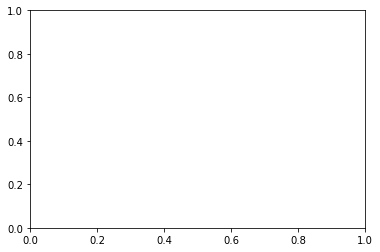

In [259]:
# fig, ax = plt.subplots(figsize=(10,8))

ax.plot(bond_df.index, bond_df['Bond'])
# ax.plot(bond_df.index, bond_df.rolling(10).mean()['Bond'])
# plt.axhline(y = 1548.6333333333334, color = 'r', linestyle = '-')


# plt.xticks(rotation=0,ticks=[0,90,180])
# plt.ylim(4000000,6000000)
plt.yticks()
# ax.vlines(x='1639008000000',ymin=1400,ymax=1700,colors='red',linestyles='dashed')

# plt.xlabel('UTC timestamp')
# plt.ylabel('Price(Gp)')
# plt.title('Price of Oldschool Runescape Bond')
# plt.legend(labels=('Daily price','10 Rolling Avg','180 day Mean','Tax introduction'))
plt.show()

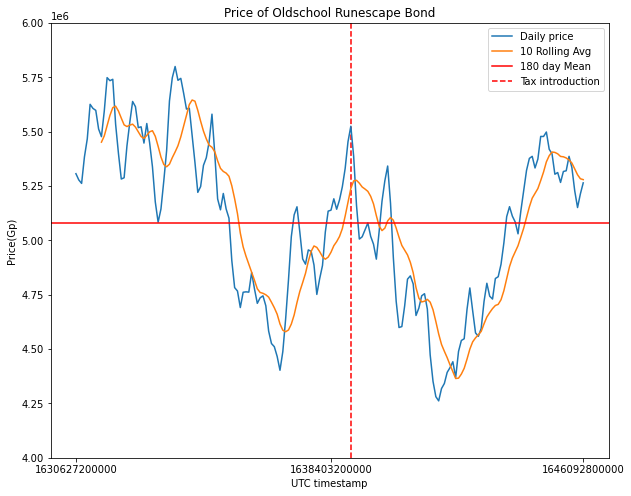

In [265]:
fig, ax = plt.subplots(figsize=(10,8))

ax.plot(bond_df.index, bond_df['Bond'])
ax.plot(bond_df.index, bond_df.rolling(10).mean()['Bond'])
plt.axhline(y = bond_df['Bond'].mean(), color = 'r', linestyle = '-')


plt.xticks(rotation=0,ticks=[0,90,179])
plt.ylim(4000000,6000000)
plt.xlabel('OSRS Bond')
plt.yticks()
ax.vlines(x='1639008000000',ymin=4000000,ymax=6000000,colors='red',linestyles='dashed')

plt.xlabel('UTC timestamp')
plt.ylabel('Price(Gp)')
plt.title('Price of Oldschool Runescape Bond')
plt.legend(labels=('Daily price','10 Rolling Avg','180 day Mean','Tax introduction'))
plt.show()

The redline signifies when the Grand Exchange, the price peaks on the day of the tax but there is no indication on causation or correlation.

In [21]:
def getList(dict):
    list = []
    for key in dict.keys():
        list.append(key)
          
    return list

In [23]:
dict_keys = getList(full_dict)

In [24]:
for i in dict_keys:
    for column in range(13):
        # print(fullDict[i][column])
        pass

In [26]:
df_runes = pd.DataFrame.from_dict(full_dict).T

In [27]:
df_runes.columns = ['Fire_rune','Water_rune','Air_rune','Earth_rune','Mind_rune','Body_rune','Death_rune','Nature_rune','Chaos_rune','Law_rune','Cosmic_rune','Blood_rune','Soul_rune']


In [28]:
scaler = StandardScaler()
df_r_scaled = scaler.fit_transform(df_runes)

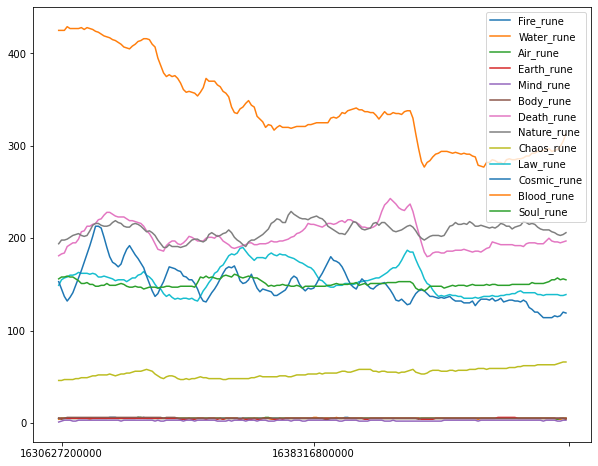

In [29]:
df_runes.plot(figsize=(10,8),xticks=[1,90,180]);

In [30]:
df_runes.head(3)

,Fire_rune,Water_rune,Air_rune,Earth_rune,Mind_rune,Body_rune,Death_rune,Nature_rune,Chaos_rune,Law_rune,Cosmic_rune,Blood_rune,Soul_rune
1630540800000,5,4,5,5,1,5,181,194,46,149,153,425,156
1630627200000,5,5,5,5,2,4,183,198,46,155,145,425,158
1630713600000,5,5,5,5,3,5,184,198,47,157,137,425,158


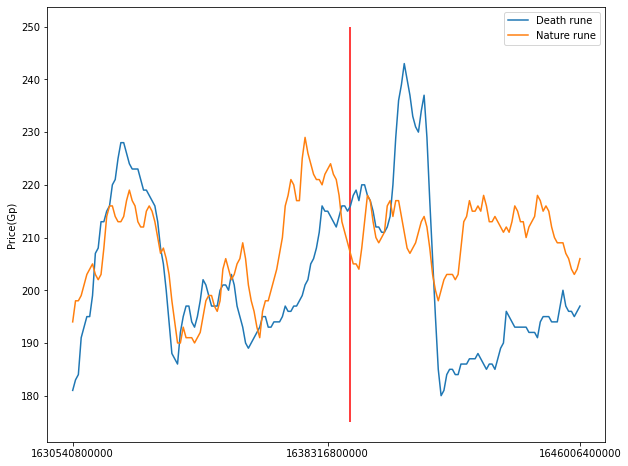

In [31]:
fig, ax = plt.subplots(figsize=(10,8))

ax.plot(df_runes.index, df_runes['Death_rune'], label='Death rune')
ax.plot(df_runes.index, df_runes['Nature_rune'], label='Nature rune')

plt.xticks(rotation=0,ticks=[0,90,179])

ax.vlines(x='1639008000000',ymin=175,ymax=250,colors='red')

plt.ylabel('Price(Gp)')
plt.legend()
plt.show()

In [32]:
type(df_r_scaled)

numpy.ndarray

In [33]:
for column in pd.DataFrame(df_r_scaled).columns:
    print(column)

0
1
2
3
4
5
6
7
8
9
10
11
12


In [34]:
# for column in pd.DataFrame(df_r_scaled).columns:
#     ax.plot(df_runes.index, df_runes[column], label='Death rune')

#     plt.xticks(rotation=0,ticks=[0,90,179])

#     ax.vlines(x='1639008000000',ymin=175,ymax=250,colors='red')

#     plt.ylabel('Price(Gp)')
#     plt.legend()
# plt.show()

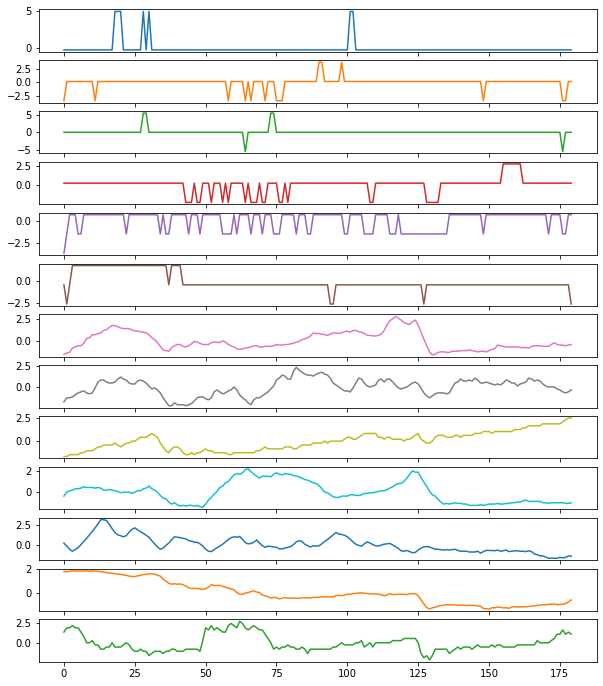

In [35]:
pd.DataFrame(df_r_scaled).plot(subplots=True,figsize=(10,12), legend=False);

A tax was added to the oldschool runescape grand exchange on December 9th 2021 (1639008000000 Epoch).

https://secure.runescape.com/m=news/grand-exchange-tax--item-sink?oldschool=1

### Finding what items are tradable on Grand Exchange using OSRSBox

In [36]:
!pip install osrsbox


In [38]:
from osrsbox import items_api
items = items_api.load()
tradable_ge = {}
for item in items:
    if item.tradeable_on_ge == True:
        tradable_ge[item.name] = item.id
    else: 
        continue

In [39]:
dict(list(tradable_ge.items())[2500:2505]) #tradable_ge is a dictionary containing all items from osrsbox that are tradable on the in game market.

{'Fishing mix(2)': 11477,
 'Fishing mix(1)': 11479,
 'Super energy mix(2)': 11481,
 'Super energy mix(1)': 11483,
 'Super str. mix(2)': 11485}

In [45]:
len(tradable_ge) #number of tradable items on the grand exchange

3759

In [44]:
tradable_ge['Cannonball'] #testing if item name is entered if correct item_id it output

2

In [42]:
top_three_df = pd.read_csv('./data/top_three_hundred_items.csv')
top_three_df.head(15)

,items
0,3rd age pickaxe
1,3rd age druidic robe top
2,3rd age druidic robe bottoms
3,Elysian sigil
4,3rd age druidic cloak
5,Twisted bow
6,3rd age bow
7,Elysian spirit shield
8,3rd age druidic staff
9,Harmonised orb


In [46]:
list_new_items = ['Zaryte crossbow','Torva platebody', 'Torva platelegs','Torva platelegs (damaged)','Torva platebody (damaged)','Nihil horn','Torva full helm','Torva full helm (damaged)','Zaryte vambraces','Ancient godsword','Ancient hilt','Condensed gold','Shattered relic hunter (t3) armour set']

In [124]:
valuable_items_df = []
for i in top_three_df['items']:
    if i not in list_new_items:
        valuable_items_df  += [i]
        # print(tradable_ge[i])

In [125]:
len(valuable_items_df), len(list_new_items) # removing new items from list of top three hundred valuable items because there will not be 

(287, 13)

In [120]:
short_ge = list(tradable_ge.values())[1:10]

## Creating dataframe

In [117]:
df = pd.DataFrame()
# for item in tradable_ge.values():
for item in short_ge:
    
    df = df.append(osrs_api(str(item)))
    # df += osrs_api(str(item))
    # time.sleep(random.randrange(1, 4))
    # print(osrs_api(str(item)))

In [118]:
df

,names,prices
0,Cannon base,183500.0
0,Cannon stand,186400.0
0,Cannon barrels,183800.0
0,Cannon furnace,190700.0
0,Insect repellent,52.0
0,Bucket of wax,752.0
0,Candle,319.0
0,Bronze arrowtips,2.0
0,Iron arrowtips,6.0


In [ ]:
df = pd.DataFrame()
for item in tradable_ge.values():
for item in short_ge:
    df = df.append(osrs_api(str(item)))

In [150]:
df_top_three = pd.DataFrame()

for item in valuable_items_df:
    try: 
        item_ids = tradable_ge[item]
        df_top_three = df_top_three.append(osrs_api(str(item_ids)))
    except:
        break
    

In [151]:
df_top_three

,names,prices
0,3rd age pickaxe,2.100000e+09
0,3rd age druidic robe top,2.000000e+09
0,3rd age druidic robe bottoms,1.900000e+09
0,Elysian sigil,1.100000e+09
0,3rd age druidic cloak,1.000000e+09
...,...,...
0,Ankou's leggings,1.170000e+07
0,Uncut zenyte,1.130000e+07
0,Elder maul,1.200000e+07
0,3rd age mage hat,1.160000e+07


In [154]:
valuable_items_df[114:]

['Justiciar chestguard',
 'Dragon platebody ornament kit',
 "Vesta's longsword",
 "Statius's warhammer",
 "Vesta's spear",
 "Zuriel's staff",
 'Gilded armour set (sk)',
 'Zenyte shard',
 'Cape of skulls',
 'Eternal gem',
 'Ancestral hat',
 "Dinh's bulwark",
 '3rd age range coif',
 'Armadyl hilt',
 'Anguish ornament kit',
 'Crystal armour seed',
 "Dagon'hai robes set",
 'Jar of darkness',
 'Toxic staff (uncharged)',
 'Armadyl helmet',
 'Ancient effigy',
 'Ankou mask',
 'Uncharged toxic trident (e)',
 "Bryophyta's staff (uncharged)",
 "Gilded d'hide vambraces",
 'Target teleport scroll',
 'Crystal tool seed',
 '3rd age vambraces',
 "Viggora's chainmace (u)",
 "Bryophyta's essence",
 'Rune pouch note',
 'Staff of the dead',
 "Saradomin's tear",
 'Smouldering stone',
 'Gilded pickaxe',
 'Hydra leather',
 'Staff of light',
 'Gilded axe',
 'Old school bond',
 'Dragon pickaxe',
 "Pirate's hook",
 "Monk's robe top (g)",
 "Dagon'hai robe top",
 'Ankou gloves',
 'Gilded platelegs',
 "Rangers' tu

In [155]:
for item in valuable_items_df[114:]: #the api is running into issues, I will have to run the function multiple times to get the full df
    try: 
        item_ids = tradable_ge[item]
        df_top_three = df_top_three.append(osrs_api(str(item_ids)))
    except:
        break

In [156]:
df_top_three

,names,prices
0,3rd age pickaxe,2.100000e+09
0,3rd age druidic robe top,2.000000e+09
0,3rd age druidic robe bottoms,1.900000e+09
0,Elysian sigil,1.100000e+09
0,3rd age druidic cloak,1.000000e+09
...,...,...
0,Armadyl helmet,1.000000e+07
0,Ancient effigy,8.000000e+06
0,Ankou mask,8.100000e+06
0,Uncharged toxic trident (e),8.500000e+06


In [160]:
for item in valuable_items_df[138:]: #continued api pulls
    try: 
        item_ids = tradable_ge[item]
        df_top_three = df_top_three.append(osrs_api(str(item_ids)))
    except:
        break

In [161]:
df_top_three

,names,prices
0,3rd age pickaxe,2.100000e+09
0,3rd age druidic robe top,2.000000e+09
0,3rd age druidic robe bottoms,1.900000e+09
0,Elysian sigil,1.100000e+09
0,3rd age druidic cloak,1.000000e+09
...,...,...
0,Flared trousers,4.500000e+06
0,Mage's book,4.000000e+06
0,Team cape zero,4.100000e+06
0,Ancient medallion,4.000000e+06


In [162]:
for item in valuable_items_df[171:]: #continued api pulls
    try: 
        item_ids = tradable_ge[item]
        df_top_three = df_top_three.append(osrs_api(str(item_ids)))
    except:
        break

In [163]:
df_top_three

,names,prices
0,3rd age pickaxe,2.100000e+09
0,3rd age druidic robe top,2.000000e+09
0,3rd age druidic robe bottoms,1.900000e+09
0,Elysian sigil,1.100000e+09
0,3rd age druidic cloak,1.000000e+09
...,...,...
0,Abyssal dagger (p),3.100000e+06
0,Abyssal dagger (p+),3.100000e+06
0,Abyssal dagger (p++),3.000000e+06
0,Karil's leathertop 0,3.300000e+06


In [164]:
for item in valuable_items_df[188:]: #continued api pulls
    try: 
        item_ids = tradable_ge[item]
        df_top_three = df_top_three.append(osrs_api(str(item_ids)))
        time.sleep(random.randrange(1, 4))
    except:
        break

In [165]:
df_top_three

,names,prices
0,3rd age pickaxe,2.100000e+09
0,3rd age druidic robe top,2.000000e+09
0,3rd age druidic robe bottoms,1.900000e+09
0,Elysian sigil,1.100000e+09
0,3rd age druidic cloak,1.000000e+09
...,...,...
0,Trailblazer relic hunter (t3) armour set,2.700000e+06
0,Black tourmaline core,2.700000e+06
0,Twisted relic hunter (t3) armour set,2.700000e+06
0,Infinity top,2.500000e+06


In [166]:
for item in valuable_items_df[209:]: #continued api pulls
    try: 
        item_ids = tradable_ge[item]
        df_top_three = df_top_three.append(osrs_api(str(item_ids)))
        time.sleep(random.randrange(1, 4))
    except:
        break

In [167]:
df_top_three

,names,prices
0,3rd age pickaxe,2.100000e+09
0,3rd age druidic robe top,2.000000e+09
0,3rd age druidic robe bottoms,1.900000e+09
0,Elysian sigil,1.100000e+09
0,3rd age druidic cloak,1.000000e+09
...,...,...
0,Ahrim's robeskirt 0,1.800000e+06
0,Holy sandals,1.500000e+06
0,Zamorak dragonhide set,1.700000e+06
0,Onyx bracelet,1.600000e+06


In [168]:
for item in valuable_items_df[258:]: #continued api pulls
    try: 
        item_ids = tradable_ge[item]
        df_top_three = df_top_three.append(osrs_api(str(item_ids)))
        time.sleep(random.randrange(1, 4))
    except:
        break

In [201]:
df_top_three

,names,prices
0,3rd age pickaxe,2.100000e+09
0,3rd age druidic robe top,2.000000e+09
0,3rd age druidic robe bottoms,1.900000e+09
0,Elysian sigil,1.100000e+09
0,3rd age druidic cloak,1.000000e+09
...,...,...
0,Dragonstone full helm,1.100000e+06
0,Dharok's platelegs 0,1.400000e+06
0,Obsidian cape (r),1.100000e+06
0,Amulet of power (t),1.100000e+06


In [171]:
for item in valuable_items_df[277:]: #continued api pulls
    try: 
        item_ids = tradable_ge[item]
        df_top_three = df_top_three.append(osrs_api(str(item_ids)))
        time.sleep(random.randrange(1, 4))
    except:
        break

In [177]:
df_top_three.info() #it's finally done!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287 entries, 0 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   names   287 non-null    object 
 1   prices  287 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.7+ KB


In [216]:
df_top_three.to_csv('./data/top_worth_items.csv',index=False)

The dataframe with the top 300 most expensive items minus 

In [186]:
test_df = df_top_three.copy()

In [214]:
for i in test_df['names']:
    test_df['item_id'] = tradable_ge[i]

In [215]:
test_df

,names,prices,item_id
0,3rd age pickaxe,2.100000e+09,8921
0,3rd age druidic robe top,2.000000e+09,8921
0,3rd age druidic robe bottoms,1.900000e+09,8921
0,Elysian sigil,1.100000e+09,8921
0,3rd age druidic cloak,1.000000e+09,8921
...,...,...,...
0,Dragonstone full helm,1.100000e+06,8921
0,Dharok's platelegs 0,1.400000e+06,8921
0,Obsidian cape (r),1.100000e+06,8921
0,Amulet of power (t),1.100000e+06,8921
